In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize



In [2]:
correl_time_local = np.loadtxt('Mean_Correlation_Time_Local_Update.dat')
correl_time_wolff = np.loadtxt('Mean_Correlation_Time_Wolff_Update.dat')
correl_time_SLMC = np.loadtxt('Mean_Correlation_Time_SLMC_Update.dat')
correl_time_RSLMC = np.loadtxt('Mean_Correlation_Time_RSLMC_Update.dat')

size_local = np.loadtxt('Correlation_Time_Size_Local_Update.dat')
size_wolff = np.loadtxt('Correlation_Time_Size_Wolff_Update.dat')
size_SLMC = np.loadtxt('Correlation_Time_Size_SLMC_Update.dat')
size_RSLMC = np.loadtxt('Correlation_Time_Size_RSLMC_Update.dat')



Fitting coefficient(Local): 0.10545977585240081 2.0794571692289936
Fitting coefficient(Wolff): 0.08874111186732747 1.8214408213676236
Fitting coefficient(SLMC): 0.016417130263509 1.894593646261062
Fitting coefficient(RSLMC): 0.2288623737516564 1.4412562894170338


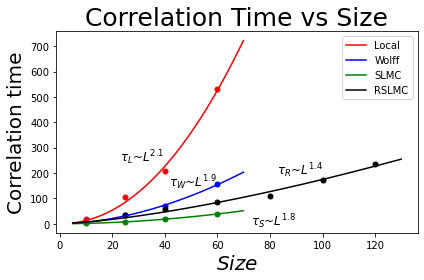

In [3]:
# plot correlation time vs size

def func(x,a,b): #fitting function
    return a*x**(b)
# Local Correlation
a1, b1 = optimize.curve_fit(func, size_local, correl_time_local)[0]
print('Fitting coefficient(Local):',a1,b1)
x1 = np.arange(5, 70, 0.1)
y1 = a1*x1**b1
 
# Wolff Correlation
a2, b2 = optimize.curve_fit(func, size_wolff, correl_time_wolff)[0]
print('Fitting coefficient(Wolff):',a2,b2)
x2 = np.arange(5, 70, 0.1)
y2 = a2*x2**b2

# SLMC Correlation
a3, b3 = optimize.curve_fit(func, size_SLMC, correl_time_SLMC)[0]
print('Fitting coefficient(SLMC):',a3,b3)
x3 = np.arange(5, 70, 0.1)
y3 = a3*x3**b3

# RSLMC Correlation
correl_time_RSLMC_change = []
restriction = [10, 15, 25, 35, 40, 40]
# Correct the scale
for i in range(len(correl_time_RSLMC)):
    correl_time_RSLMC_change.append(correl_time_RSLMC[i]/(size_RSLMC[i]**2/((restriction[i]*2)**2/2)))

a4, b4 = optimize.curve_fit(func, size_RSLMC, correl_time_RSLMC_change)[0]
print('Fitting coefficient(RSLMC):',a4,b4)
x4 = np.arange(5, 130, 0.1)
y4 = a4*x4**b4

plt.figure()
plt.scatter(size_local[:], correl_time_local[:], 25, "red")  
plt.plot(x1, y1, "red", label = 'Local')
plt.scatter(size_wolff[:], correl_time_wolff[:], 25, "blue")  
plt.plot(x2, y2, "blue", label = 'Wolff')
plt.scatter(size_SLMC[:], correl_time_SLMC[:], 25, "green")  
plt.plot(x3, y3, "green", label = 'SLMC')
plt.scatter(size_RSLMC[:], correl_time_RSLMC_change[:], 25, "black")  
plt.plot(x4, y4, "black", label = 'RSLMC')
plt.legend()
plt.title("Correlation Time vs Size", fontsize=25)
plt.xlabel("$Size$", fontsize=20)
plt.ylabel("Correlation time", fontsize=20)

plt.text(40,300,r'$\tau_L \textasciitilde L^{2.1}$',fontsize=12,verticalalignment="top",horizontalalignment="right")
plt.text(60,200,r'$\tau_W \textasciitilde L^{1.9}$',fontsize=12,verticalalignment="top",horizontalalignment="right")
plt.text(100,250,r'$\tau_R \textasciitilde L^{1.4}$',fontsize=12,verticalalignment="top",horizontalalignment="right")
plt.text(90,50,r'$\tau_S \textasciitilde L^{1.8}$',fontsize=12,verticalalignment="top",horizontalalignment="right")
plt.tight_layout()
plt.savefig('Correlation_time_vs_Size.png')
plt.show()


Local: Autocorrelation time = 147.8009450961182
Wolff: Autocorrelation time = 16.370703831234025
SLMC: Autocorrelation time = 6.984490270716429


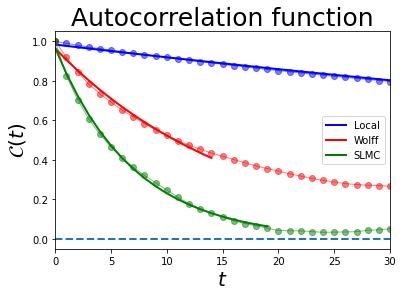

In [4]:
# L = 25 
# plot autocorrelation function obtained from different update algorithm

Local = np.loadtxt('Local')
Wolff = np.loadtxt('Wolff')
SLMC = np.loadtxt('SLMC')
RSLMC = np.loadtxt('RSLMC')


n_fit_pts = 50
xr = np.arange(n_fit_pts, dtype=float)

# fit autocorrelation function
f = lambda x, a, b: a*np.exp(-x/float(b))
a1, b1 = optimize.curve_fit(f, xr, Local[0:n_fit_pts], p0=(1000,1))[0]
print("Local: Autocorrelation time =", b1)

plt.plot(np.abs(Local), '-bo', lw=1, alpha=0.5)

plt.plot(xr, (f(xr, a1, b1)), 'b-', lw=2, label='Local')
#plt.plot([0,300], [0,0], 'b--', lw=2)
plt.legend()
plt.title("Autocorrelation function", fontsize=25)
plt.xlabel("$t$", fontsize=20)
plt.ylabel(r"$\mathcal{C}(t)$", fontsize=20)
plt.xlim(0, n_fit_pts+10)

n_fit_pts = 15
xr = np.arange(n_fit_pts, dtype=float)
a2, b2 = optimize.curve_fit(f, xr, Wolff[0:n_fit_pts], p0=(1000,1))[0]
print("Wolff: Autocorrelation time =", b2)
plt.plot(np.abs(Wolff), '-ro', lw=1, alpha=0.5)

plt.plot(xr, (f(xr, a2, b2)), 'r-', lw=2, label='Wolff')
#plt.plot([0,300], [0,0], 'r--', lw=2)
plt.legend()
plt.title("Autocorrelation function", fontsize=25)
plt.xlabel("$t$", fontsize=20)
plt.ylabel(r"$\mathcal{C}(t)$", fontsize=20)
plt.xlim(0, n_fit_pts+10)

n_fit_pts = 20
xr = np.arange(n_fit_pts, dtype=float)
a3, b3 = optimize.curve_fit(f, xr, SLMC[0:n_fit_pts], p0=(1000,1))[0]
print("SLMC: Autocorrelation time =", b3)
plt.plot(np.abs(SLMC), '-go', lw=1, alpha=0.5)

plt.plot(xr, (f(xr, a3, b3)), 'g-', lw=2, label='SLMC')
#plt.plot([0,300], [0,0], 'g--', lw=2)
plt.legend()
plt.title("Autocorrelation function", fontsize=25)
plt.xlabel("$t$", fontsize=20)
plt.ylabel(r"$\mathcal{C}(t)$", fontsize=20)
plt.xlim(0, n_fit_pts+10)

plt.plot([0,300], [0,0], '--', lw=2)
plt.savefig('Autocorrel_fitting(L=25).png')

